# Explanation of attention models

### Step-by-Step Walkthrough

1. **Semantic Embeddings with Word2Vec (Skip-gram)** - 'trick' a deep neural network to generate semantic embedding vectors
2. **Attention Mechanism** - move similar vectors toward each other
3. **Visualization**

### Step 1: Semantic Embeddings with Word2Vec (Skip-gram)

Word2Vec aims to map words into a continuous vector space where semantically similar words are mapped to nearby points. In the Skip-gram model, given a word, the model tries to predict the surrounding words within a certain window.

#### Training Word2Vec (Skip-gram)
1. **Input Word**: Let's say our input word is "bat".
2. **Context Words**: For the input word, we consider a window of context words around it. For example, in the sentence "bat in the cave", with a window size of 2, the context words are ["in", "the", "cave"].
3. **Word Pairs**: Create pairs of (input_word, context_word). For example, ("bat", "in"), ("bat", "the"), ("bat", "cave").
4. **Training Objective**: The objective is to maximize the probability of predicting context words given the input word. This is achieved by adjusting the weights in the neural network.

#### Semantic Embeddings
1. **Weight Matrices**: During training, two weight matrices are learned:
   - Input weight matrix $ W_{in} $
   - Output weight matrix $ W_{out} $

2. **Embedding Extraction**: The semantic embedding for a word is typically taken from the input weight matrix $ W_{in} $.

### Step 2: Attention Mechanism

The attention mechanism allows the model to focus on different parts of the input sentence when producing an output. It computes a weighted sum of the embeddings of all words in the sentence to create a context-aware representation for each word.

#### Attention Calculation
Given a sentence "bat in the cave" with semantic embeddings $ X_1, X_2, X_3, X_4 $:

1. **Dot Product**: Compute the dot product of the embedding of the target word with every other word in the sentence.
2. **Weighted Sum**: Use these dot products as weights to compute a weighted sum of all word embeddings.

### Example Sentence: "bat in the cave"

Let's assume the semantic embeddings are:
- $ X_1 $ ("bat") = [0.5, 0.1]
- $ X_2 $ ("in") = [0.1, 0.2]
- $ X_3 $ ("the") = [0.2, 0.3]
- $ X_4 $ ("cave") = [0.45, 0.15]

#### Dot Products for All Words
For $ X_1 $ ("bat"):
- $ X_1 \cdot X_1 $ = 0.5*0.5 + 0.1*0.1 = 0.26
- $ X_1 \cdot X_2 $ = 0.5*0.1 + 0.1*0.2 = 0.07
- $ X_1 \cdot X_3 $ = 0.5*0.2 + 0.1*0.3 = 0.13
- $ X_1 \cdot X_4 $ = 0.5*0.45 + 0.1*0.15 = 0.24

For $ X_2 $ ("in"):
- $ X_2 \cdot X_1 $ = 0.1*0.5 + 0.2*0.1 = 0.07
- $ X_2 \cdot X_2 $ = 0.1*0.1 + 0.2*0.2 = 0.05
- $ X_2 \cdot X_3 $ = 0.1*0.2 + 0.2*0.3 = 0.08
- $ X_2 \cdot X_4 $ = 0.1*0.45 + 0.2*0.15 = 0.075

For $ X_3 $ ("the"):
- $ X_3 \cdot X_1 $ = 0.2*0.5 + 0.3*0.1 = 0.13
- $ X_3 \cdot X_2 $ = 0.2*0.1 + 0.3*0.2 = 0.08
- $ X_3 \cdot X_3 $ = 0.2*0.2 + 0.3*0.3 = 0.13
- $ X_3 \cdot X_4 $ = 0.2*0.45 + 0.3*0.15 = 0.115

For $ X_4 $ ("cave"):
- $ X_4 \cdot X_1 $ = 0.45*0.5 + 0.15*0.1 = 0.24
- $ X_4 \cdot X_2 $ = 0.45*0.1 + 0.15*0.2 = 0.075
- $ X_4 \cdot X_3 $ = 0.45*0.2 + 0.15*0.3 = 0.115
- $ X_4 \cdot X_4 $ = 0.45*0.45 + 0.15*0.15 = 0.2175

#### Calculate Attention-Weighted Vectors
For $ y_1 $ ("bat"):
$$
y_1 = X_1 \cdot (X_1 \cdot X_1) + X_2 \cdot (X_1 \cdot X_2) + X_3 \cdot (X_1 \cdot X_3) + X_4 \cdot (X_1 \cdot X_4)
$$

For $ y_2 $ ("in"):
$$
y_2 = X_1 \cdot (X_2 \cdot X_1) + X_2 \cdot (X_2 \cdot X_2) + X_3 \cdot (X_2 \cdot X_3) + X_4 \cdot (X_2 \cdot X_4)
$$

For $ y_3 $ ("the"):
$$
y_3 = X_1 \cdot (X_3 \cdot X_1) + X_2 \cdot (X_3 \cdot X_2) + X_3 \cdot (X_3 \cdot X_3) + X_4 \cdot (X_3 \cdot X_4)
$$

For $ y_4 $ ("cave"):
$$
y_4 = X_1 \cdot (X_4 \cdot X_1) + X_2 \cdot (X_4 \cdot X_2) + X_3 \cdot (X_4 \cdot X_3) + X_4 \cdot (X_4 \cdot X_4)
$$

### Detailed Calculations

#### For $ y_1 $ ("bat"):
1. $ 0.26 \cdot [0.5, 0.1] = [0.13, 0.026] $
2. $ 0.07 \cdot [0.1, 0.2] = [0.007, 0.014] $
3. $ 0.13 \cdot [0.2, 0.3] = [0.026, 0.039] $
4. $ 0.24 \cdot [0.45, 0.15] = [0.108, 0.036] $

$$
y_1 = [0.13, 0.026] + [0.007, 0.014] + [0.026, 0.039] + [0.108, 0.036] = [0.271, 0.115]
$$

#### For $ y_2 $ ("in"):
1. $ 0.07 \cdot [0.5, 0.1] = [0.035, 0.007] $
2. $ 0.05 \cdot [0.1, 0.2] = [0.005, 0.01] $
3. $ 0.08 \cdot [0.2, 0.3] = [0.016, 0.024] $
4. $ 0.075 \cdot [0.45, 0.15] = [0.03375, 0.01125] $

$$
y_2 = [0.035, 0.007] + [0.005, 0.01] + [0.016, 0.024] + [0.03375, 0.01125] = [0.08975, 0.05225]
$$

#### For $ y_3 $ ("the"):
1. $ 0.13 \cdot [0.5, 0.1] = [0.065, 0.013] $
2. $ 0.08 \cdot [0.1, 0.2] = [0.008, 0.016] $
3. $ 0.13 \cdot [0.2, 0.3] = [0.026, 0.039] $
4. $ 0.115 \cdot [0.45, 0.15] = [0.05175, 0.01725] $

$ \cdot$

$$
y_3 = [0.065, 0.013] + [0.008, 0.016] + [0.026, 0.039] + [0.05175, 0.01725] = [0.15075, 0.08525]
$$

#### For $ y_4 $ ("cave"):
1. $ 0.24 \cdot [0.5, 0.1] = [0.12, 0.024] $
2. $ 0.075 \cdot [0.1, 0.2] = [0.0075, 0.015] $
3. $ 0.115 \cdot [0.2, 0.3] = [0.023, 0.0345] $
4. $ 0.2175 \cdot [0.45, 0.15] = [0.097875, 0.032625] $

$$
y_4 = [0.12, 0.024] + [0.0075, 0.015] + [0.023, 0.0345] + [0.097875, 0.032625] = [0.248375, 0.106125]
$$

### Summary

**Semantic Embeddings**: Created using the Skip-gram model in Word2Vec, where each word is represented by a high-dimensional vector. These vectors capture the semantic relationships between words based on their context in the training data. For instance, in the sentence "bat in the cave", we obtain initial embeddings for each word.

**Attention Mechanism**: Computes a context-aware representation of each word by considering the relevance of each word to every other word in the sentence. This is done through the dot product of their embeddings. The attention mechanism allows the model to focus on the relevant context, making the word vectors context-sensitive.

**Visualizing the Process**:
1. **Original Vectors**: These are the initial semantic embeddings obtained from Word2Vec. They are represented by solid lines in the plot.
2. **Attention-Weighted Vectors**: These vectors are transformed by the attention mechanism, represented by dashed lines. Each attention-weighted vector is a weighted sum of the original vectors, where the weights are derived from the dot products between the target word and all other words in the sentence.

**Example Sentence**: "bat in the cave"
- **Original Vectors**: Represent the initial semantic meanings of "bat", "in", "the", and "cave".
- **Attention-Weighted Vectors**: Show how each word's meaning is adjusted based on its context. For example, "bat" is disambiguated to reflect its likely association with the animal due to the context provided by "cave".

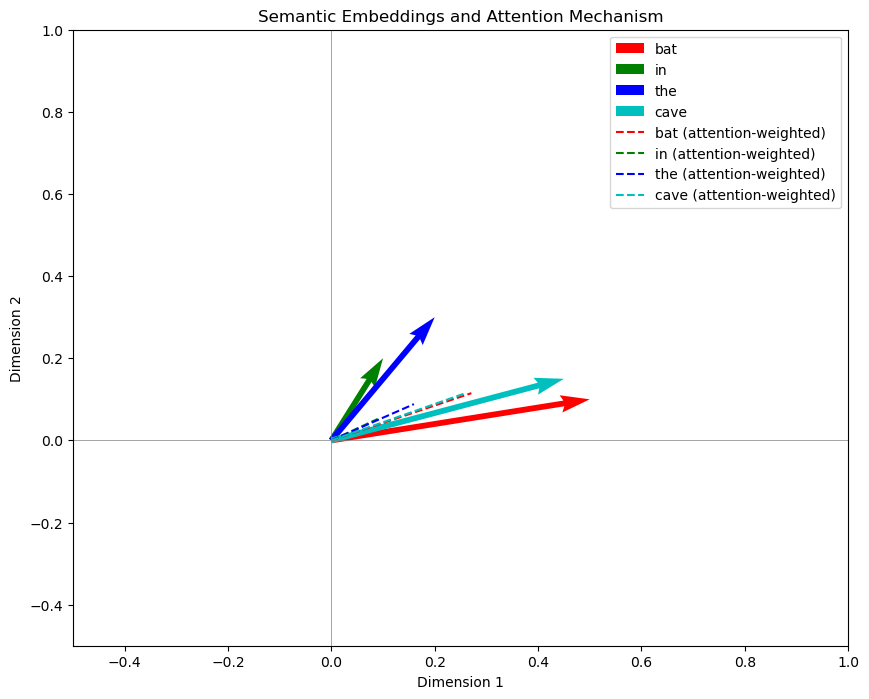

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the semantic embeddings such that 'bat' and 'cave' are semantically similar
X_bat = np.array([0.5, 0.1])
X_in = np.array([0.1, 0.2])
X_the = np.array([0.2, 0.3])
X_cave = np.array([0.45, 0.15])

# Compute dot products for the attention mechanism
dot_X1_X1 = np.dot(X_bat, X_bat)
dot_X1_X2 = np.dot(X_bat, X_in)
dot_X1_X3 = np.dot(X_bat, X_the)
dot_X1_X4 = np.dot(X_bat, X_cave)

dot_X2_X1 = np.dot(X_in, X_bat)
dot_X2_X2 = np.dot(X_in, X_in)
dot_X2_X3 = np.dot(X_in, X_the)
dot_X2_X4 = np.dot(X_in, X_cave)

dot_X3_X1 = np.dot(X_the, X_bat)
dot_X3_X2 = np.dot(X_the, X_in)
dot_X3_X3 = np.dot(X_the, X_the)
dot_X3_X4 = np.dot(X_the, X_cave)

dot_X4_X1 = np.dot(X_cave, X_bat)
dot_X4_X2 = np.dot(X_cave, X_in)
dot_X4_X3 = np.dot(X_cave, X_the)
dot_X4_X4 = np.dot(X_cave, X_cave)

# Compute the attention-weighted vectors for all words
y_bat = (dot_X1_X1 * X_bat + dot_X1_X2 * X_in + dot_X1_X3 * X_the + dot_X1_X4 * X_cave)
y_in = (dot_X2_X1 * X_bat + dot_X2_X2 * X_in + dot_X2_X3 * X_the + dot_X2_X4 * X_cave)
y_the = (dot_X3_X1 * X_bat + dot_X3_X2 * X_in + dot_X3_X3 * X_the + dot_X3_X4 * X_cave)
y_cave = (dot_X4_X1 * X_bat + dot_X4_X2 * X_in + dot_X4_X3 * X_the + dot_X4_X4 * X_cave)

# Plot the original and transformed vectors
plt.figure(figsize=(10, 8))

# Plot the original vectors
plt.quiver(0, 0, X_bat[0], X_bat[1], angles='xy', scale_units='xy', scale=1, color='r', label='bat')
plt.quiver(0, 0, X_in[0], X_in[1], angles='xy', scale_units='xy', scale=1, color='g', label='in')
plt.quiver(0, 0, X_the[0], X_the[1], angles='xy', scale_units='xy', scale=1, color='b', label='the')
plt.quiver(0, 0, X_cave[0], X_cave[1], angles='xy', scale_units='xy', scale=1, color='c', label='cave')

# Plot the transformed vectors as separate lines (dashed lines)
plt.plot([0, y_bat[0]], [0, y_bat[1]], 'r--', label='bat (attention-weighted)')
plt.plot([0, y_in[0]], [0, y_in[1]], 'g--', label='in (attention-weighted)')
plt.plot([0, y_the[0]], [0, y_the[1]], 'b--', label='the (attention-weighted)')
plt.plot([0, y_cave[0]], [0, y_cave[1]], 'c--', label='cave (attention-weighted)')

# Set limits and labels
plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Semantic Embeddings and Attention Mechanism')
plt.legend()
plt.grid(False)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()


### Notice how 'bat' and 'cave' both moved to become almost parallel.

In higher dimensions this will likely behave differently

Note, in higher dimensions, dot products between similar words will have more significance.

That is, in high dimensions, most words will be different according to most characteristics, so if they happen to both have similar characteristics, this is very meaningful.  